# Uppgifter 

Klassificera testdatan korrekt.



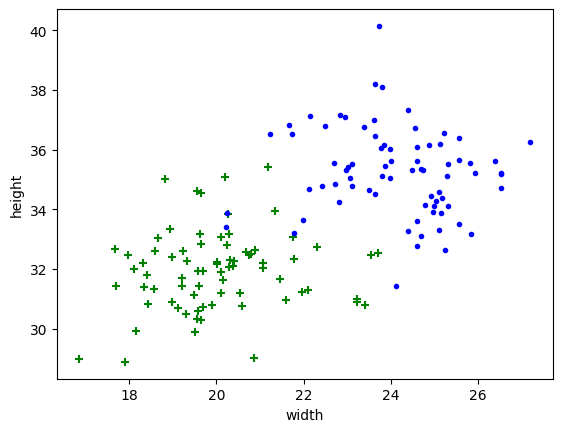

Punkt (25.0, 32.0) klassificeras som Pikachu
Punkt (24.2, 31.5) klassificeras som Pikachu
Punkt (22.0, 34.0) klassificeras som Pikachu
Punkt (20.5, 34.0) klassificeras som Pichu


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import re

############################################### GRAF ##################################################
# 1. Läser filen
train_data = pd.read_csv(r"C:\Code\Inlamning2-Pikachu\Data\datapoints.txt")

# Gör om train_data till dataframe
df = pd.DataFrame(train_data)

# Städar kolumnnamn från mellanslag
train_data.columns = train_data.columns.str.strip()

# Ändrar namn på kolumnerna
df.columns = ['width', 'height', 'label', 'nummer']

# Separera på Pichu och Pikachu
df1 = df[df.label == 0]     # df1 = Pichu
df2 = df[df.label == 1]     # df2 = Pikachu

# Skapar scatter plot med Pichu (grön) och Pikachu (blå)
plt.xlabel('width')
plt.ylabel('height')
plt.scatter(df1['width'], df1['height'], color="green", marker='+')  # Pichu
plt.scatter(df2['width'], df2['height'], color="blue", marker='.')   # Pikachu
plt.show()

############################################################################# KLASSIFICERING AV NYA DATAPUNKTER

# Funktion för att beräkna euklidiskt avstånd
def euclidean_distance(p1, p2, q1=0, q2=0):
    return math.sqrt((p1 - q1) ** 2 + (p2 - q2) ** 2)

# Funktion för att klassificera nya datapunkter baserat på närmsta granne
def classify_new_point(new_points, df):
    classifications = []
    for new_point in new_points:
        new_width, new_height = new_point
        min_distance = float('inf')
        closest_label = None
        
        # Jämför varje ny punkt med alla träningsdata
        for index, row in df.iterrows():
            distance = euclidean_distance(new_width, new_height, row['width'], row['height'])
            if distance < min_distance:
                min_distance = distance
                closest_label = row['label']
        
        classifications.append((new_point, closest_label))
    return classifications

# Läser testpunkter från testpoints.txt
test_points = []
with open("../Data/Testpoints.txt", "r") as file:
    lines = file.readlines()
    for line in lines:
        match = re.search(r"\((\d+(\.\d+)?),\s*(\d+(\.\d+)?)\)", line)  # Extraherar koordinater
        if match:
            x, y = float(match.group(1)), float(match.group(3))
            test_points.append((x, y))

# Klassificerar testpunkterna
result = classify_new_point(test_points, df)

# Skriver ut resultatet
for point, label in result:
    print(f"Punkt {point} klassificeras som {'Pichu' if label == 0 else 'Pikachu'}")


1. Låt användaren mata in en testpunkt och låt algoritmen avgöra dess klass. Ta med felhanteringen
som tar hand om negativa tal och icke-numeriska inputs. Se till att ha användarvänliga felmeddelanden.



In [16]:
import math
import pandas as pd

# Funktion för att beräkna euklidiskt avstånd
def euclidean_distance(p1, p2, q1=0, q2=0):
    return math.sqrt((p1 - q1) ** 2 + (p2 - q2) ** 2)

# Funktion för att klassificera en ny datapunkt
def classify_new_point(new_point, df):
    new_width, new_height = new_point
    min_distance = float('inf')
    closest_label = None
    
    # Jämför varje ny punkt med alla träningsdata
    for index, row in df.iterrows():
        distance = euclidean_distance(new_width, new_height, row['width'], row['height'])
        if distance < min_distance:
            min_distance = distance
            closest_label = row['label']
    
    return closest_label

# Läser filen med träningsdata
train_data = pd.read_csv(r"C:\Code\Inlamning2-Pikachu\Data\datapoints.txt")
train_data.columns = ['width', 'height', 'label', 'nummer']  # Ställer in kolumnnamn korrekt

# Felhanteringsfunktion för inmatning
def get_user_input():
    while True:
        try:
            # Ber användaren om inmatning
            width = float(input("Ange bredd : "))
            height = float(input("Ange höjd : "))
            
            # Kollar om talen är negativa
            if width < 0 or height < 0:
                raise ValueError("Bredd och höjd måste vara positiva tal.")
            
            return width, height
        
        except ValueError as ve:
            print(f"Fel: {ve}. Försök igen.")

# Låter användaren mata in testpunkter
user_point = get_user_input()

# Klassificerar användarens inmatade punkt
result_label = classify_new_point(user_point, train_data)

# Skriver ut resultatet
print(f"Punkt {user_point} klassificeras som {'Pichu' if result_label == 0 else 'Pikachu'}")


Punkt (20.5, 34.0) klassificeras som Pichu


2. . Den approachen vi använt med närmaste punkten kan klassificera fel när punkterna för respektive
klass går in i varandra. **_Nu ska du istället välja de tio närmaste punkterna till din testpunkt_** 
Den klass testpunkten tillhör avgörs av majoritetsröstning av de närmaste punkterna



In [17]:
import math
import pandas as pd
from collections import Counter

# Funktion för att beräkna euklidiskt avstånd
def euclidean_distance(p1, p2, q1=0, q2=0):
    return math.sqrt((p1 - q1) ** 2 + (p2 - q2) ** 2)

# Funktion för att klassificera nya punkter med k-NN (här k=10)
def classify_knn(new_point, df, k=10):
    distances = []
    
    # Beräkna avstånd från den nya punkten till alla punkter i träningsdata
    for index, row in df.iterrows():
        distance = euclidean_distance(new_point[0], new_point[1], row['width'], row['height'])
        distances.append((distance, row['label']))

    # Sortera alla avstånd i stigande ordning och välj de k närmaste punkterna
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    
    # Majoritetsröstning: avgör klass baserat på majoriteten av de k närmaste punkterna
    majority_vote = Counter(k_nearest_labels).most_common(1)[0][0]
    
    return majority_vote

# Läser träningsdata från filen
train_data = pd.read_csv(r"C:\Code\Inlamning2-Pikachu\Data\datapoints.txt")
train_data.columns = ['width', 'height', 'label', 'nummer']  # Rättar kolumnnamn


# Låter användaren mata in testpunkter
user_point = get_user_input()

# Klassificerar användarens inmatade punkt med k-NN (k=10)
result_label = classify_knn(user_point, train_data, k=10)

# Skriver ut resultatet
print(f"Punkt {user_point} klassificeras som {'Pichu' if result_label == 0 else 'Pikachu'}")


Punkt (30.0, 30.0) klassificeras som Pikachu


----------------------------------------------------------

# Bonusuppgifter
3. Dela in ursprungsdatan slumpmässigt så att:
- 100 är träningsdata (50 Pikachu, 50 Pichu)
- 50 är testdata (25 Pikachu, 25 Pichu)



4. Beräkna noggranheten genom följande formel:

accuracy = $(TP+TN)/(total)$


| |  | Pikachu actual | Pichu actual |
|---|--|---|---|
|Pikachu predicted| | TP| FP
|Pichu predicted| |FN|TN


Här har vi låtit Pikachu vara positiv och Pichu vara "icke-Pikachu" dvs negativ.
***Notera: För varje testpunkt beräknar vi distansen till träningspunkterna***


In [16]:
import math
import pandas as pd
from collections import Counter

# Funktion för att beräkna euklidiskt avstånd
def euclidean_distance(p1, p2, q1=0, q2=0):
    return math.sqrt((p1 - q1) ** 2 + (p2 - q2) ** 2)

# Funktion för k-NN klassificering (k=10)
def classify_knn(new_point, train_data, k=10):
    distances = []
    
    # Beräkna avstånd från den nya punkten till alla punkter i träningsdata
    for index, row in train_data.iterrows():
        distance = euclidean_distance(new_point[0], new_point[1], row['width'], row['height'])
        distances.append((distance, row['label']))

    # Sortera alla avstånd i stigande ordning och välj de k närmaste punkterna
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    
    # Majoritetsröstning
    majority_vote = Counter(k_nearest_labels).most_common(1)[0][0]
    
    return majority_vote

# Läser tränings- och testdatan från den tidigare uppdelningen
train_data = pd.concat([train_pichu, train_pikachu]).reset_index(drop=True)
test_data = pd.concat([test_pichu, test_pikachu]).reset_index(drop=True)

# Variabler för att hålla reda på TP, TN, FP, FN
TP = 0  # True Positive
TN = 0  # True Negative
FP = 0  # False Positive
FN = 0  # False Negative

# Klassificera varje punkt i testdatan och uppdatera räknare
for index, row in test_data.iterrows():
    test_point = (row['width'], row['height'])
    true_label = row['label']  # Faktisk label
    
    predicted_label = classify_knn(test_point, train_data, k=10)  # Klassificering med k-NN
    
    # Uppdaterar räknare baserat på den faktiska och förutspådda etiketten
    if true_label == 1:  # Om det är Pikachu
        if predicted_label == 1:
            TP += 1  # True Positive
        else:
            FN += 1  # False Negative (Pikachu klassificeras som Pichu)
    else:  # Om det är Pichu
        if predicted_label == 0:
            TN += 1  # True Negative
        else:
            FP += 1  # False Positive (Pichu klassificeras som Pikachu)

# Beräkna total antal testpunkter
total = len(test_data)

# Beräkna noggrannhet
accuracy = (TP + TN) / total

# Skriver ut resultatet
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"Noggrannhet: {accuracy * 100:.2f}%")


True Positives (TP): 23
True Negatives (TN): 24
False Positives (FP): 1
False Negatives (FN): 2
Noggrannhet: 94.00%



 5. Upprepa uppgift 3 och 4 tio gånger, plotta en graf över accuracy och rapportera medelaccuracy.

 

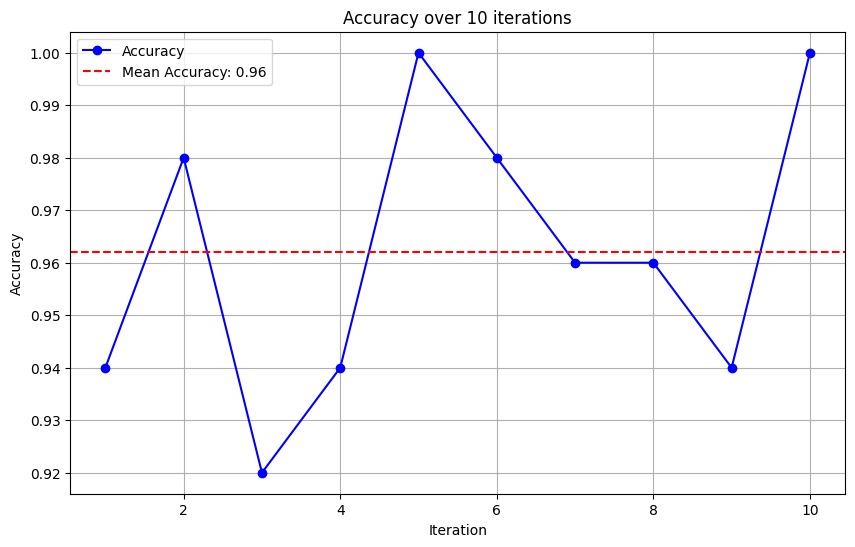

Medelnoggrannhet efter 10 körningar: 96.20%


In [19]:
import math
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Funktion för att beräkna euklidiskt avstånd
def euclidean_distance(p1, p2, q1=0, q2=0):
    return math.sqrt((p1 - q1) ** 2 + (p2 - q2) ** 2)

# Funktion för k-NN klassificering (k=10)
def classify_knn(new_point, train_data, k=10):
    distances = []
    
    # Beräkna avstånd från den nya punkten till alla punkter i träningsdata
    for index, row in train_data.iterrows():
        distance = euclidean_distance(new_point[0], new_point[1], row['width'], row['height'])
        distances.append((distance, row['label']))

    # Sortera alla avstånd i stigande ordning och välj de k närmaste punkterna
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    
    # Majoritetsröstning
    majority_vote = Counter(k_nearest_labels).most_common(1)[0][0]
    
    return majority_vote

# Funktion för att beräkna noggrannhet för ett test-set
def calculate_accuracy(train_data, test_data):
    TP = TN = FP = FN = 0  # Initialisera räknare för True/False Positives/Negatives
    
    for index, row in test_data.iterrows():
        test_point = (row['width'], row['height'])
        true_label = row['label']  # Faktisk label
        
        predicted_label = classify_knn(test_point, train_data, k=10)  # Klassificering med k-NN
        
        # Uppdaterar räknare baserat på den faktiska och förutspådda etiketten
        if true_label == 1:  # Pikachu
            if predicted_label == 1:
                TP += 1  # True Positive
            else:
                FN += 1  # False Negative (Pikachu klassificeras som Pichu)
        else:  # Pichu
            if predicted_label == 0:
                TN += 1  # True Negative
            else:
                FP += 1  # False Positive (Pichu klassificeras som Pikachu)

    # Beräkna total antal testpunkter
    total = len(test_data)
    
    # Beräkna noggrannhet
    accuracy = (TP + TN) / total
    return accuracy

# Funktion för att slumpmässigt dela data och returnera tränings- och test-set
def split_data(data):
    pichu_data = data[data['label'] == 0]
    pikachu_data = data[data['label'] == 1]

    # Slumpmässigt välj 50 Pichu och 50 Pikachu till träningsdata
    train_pichu = pichu_data.sample(n=50, random_state=None)
    train_pikachu = pikachu_data.sample(n=50, random_state=None)

    # De resterande 25 Pichu och 25 Pikachu blir testdata
    test_pichu = pichu_data.drop(train_pichu.index)
    test_pikachu = pikachu_data.drop(train_pikachu.index)

    # Slår samman tränings- och testdatan
    train_data = pd.concat([train_pichu, train_pikachu]).reset_index(drop=True)
    test_data = pd.concat([test_pichu, test_pikachu]).reset_index(drop=True)
    
    return train_data, test_data

# Läser in ursprungsdatan
data = pd.read_csv(r"C:\Code\Inlamning2-Pikachu\Data\datapoints.txt")
data.columns = ['width', 'height', 'label', 'nummer']  # Rättar kolumnnamn

# Lista för att spara noggrannheter från varje upprepning
accuracies = []

# Kör experimentet 10 gånger
for i in range(10):
    train_data, test_data = split_data(data)  # Dela data
    accuracy = calculate_accuracy(train_data, test_data)  # Beräkna noggrannhet
    accuracies.append(accuracy)  # Spara noggrannheten

# Beräkna medelnoggrannhet
mean_accuracy = np.mean(accuracies)

# Plotta en graf över noggrannheterna från varje körning
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
plt.axhline(y=mean_accuracy, color='r', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
plt.title('Accuracy over 10 iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Skriv ut medelaccuracy
print(f"Medelnoggrannhet efter 10 körningar: {mean_accuracy * 100:.2f}%")


----------------------------------------------------------

 ### **Bedömning**

 Om du har fått någon kodsnutt från någon annan eller hittat i någon sida är det **viktigt att du källhänvisar.**

 Skriv en kommentar bredvid koden som du har tagit.

 

 **Godkänt**
 - löst grunduppgift, samt övriga uppgifter på korrekt sätt
 - koden är kommenterad med relevanta kommentarer
 - variabelnamnen är bra valda
 - gjort flera relevanta git commits

 **Väl Godkänt**
 - koden är enkel att följa
 - koden är effektiv
 - koden är välstrukturerad med lämpliga funktioner
 - kommentarerna är datavetenskapligt korrekta
 - löst samtliga uppgifter